<a href="https://colab.research.google.com/github/farahwadya/Predection-of-sales--machine-learning/blob/main/Predection_of_sales_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing packages

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.linear_model import LinearRegression


# uploading dataset

In [2]:
fpath='/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df_sales=pd.read_csv(fpath)

In [39]:
df_sales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Est_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_sales.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Cleaning Data



In [6]:
df_sales.select_dtypes('object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [7]:
df_sales.rename(columns={'Item_Identifier': 'Item_Id','Outlet_Establishment_Year': 'Est_Year', 'Outlet_Identifier':'Outlet_Id'}	, inplace=True)
df_sales.head()

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Id,Est_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df_sales.select_dtypes('int64','float64')

,Est_Year
0,1999
1,2009
2,1999
3,1998
4,1987
...,...
8518,1987
8519,2002
8520,2004
8521,2009


In [9]:
columns_to_convert = ['Item_Visibility', 'Item_Weight', 'Item_Outlet_Sales']
df_sales[columns_to_convert] = df_sales[columns_to_convert].apply(pd.to_numeric)
print(df_sales[columns_to_convert].dtypes)

Item_Visibility      float64
Item_Weight          float64
Item_Outlet_Sales    float64
dtype: object


In [10]:
df_sales.select_dtypes(include=['int64', 'float64'])

,Item_Weight,Item_Visibility,Item_MRP,Est_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


#### checking for duplicates

In [11]:
n_duplicates=df_sales.duplicated().sum()
n_duplicates

np.int64(0)

#### checking for missing data

In [12]:
n_missing=df_sales.isna().sum()
n_missing
#missing will be handeled before modeling

,0
Item_Id,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Id,0
Est_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


#### checking for consistency

In [13]:
df_sales.head(5)

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Id,Est_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
object_cols = df_sales.select_dtypes(include='object')
print(object_cols.nunique()) #Outlet_Type Outlet_Size Item_Fat_Content Outlet_Location_Type Outlet_Type

Item_Id                 1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Id                 10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64


In [15]:
cols_to_check = ['Outlet_Type', 'Outlet_Size', 'Item_Fat_Content', 'Outlet_Location_Type']

# showing unique values
for col in cols_to_check:
    print(f"unique values {col}:")
    print(df_sales[col].unique())

unique values Outlet_Type:
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
unique values Outlet_Size:
['Medium' nan 'High' 'Small']
unique values Item_Fat_Content:
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
unique values Outlet_Location_Type:
['Tier 1' 'Tier 3' 'Tier 2']


In [16]:
# item fat content:
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'})
df_sales['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

## Statistical numeric

In [17]:
numerical_cols = df_sales.select_dtypes(include=['int64', 'float64'])

# نعرض الملخص الإحصائي لكل عمود: min, max, mean
summary_stats = numerical_cols.agg(['min', 'max', 'mean'])
print(summary_stats)

      Item_Weight  Item_Visibility    Item_MRP     Est_Year  Item_Outlet_Sales
min      4.555000         0.000000   31.290000  1985.000000          33.290000
max     21.350000         0.328391  266.888400  2009.000000       13086.964800
mean    12.857645         0.066132  140.992782  1997.831867        2181.288914


# Data exploration

### scatter plot show the relation between Item Visibility vs Outlet Sales

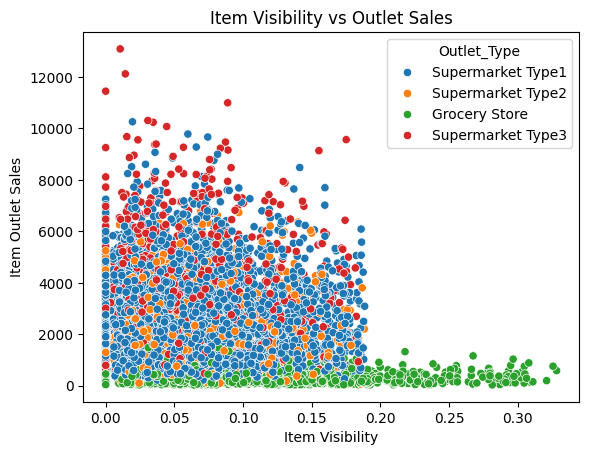

In [18]:
sns.scatterplot(data=df_sales, x='Item_Visibility', y='Item_Outlet_Sales',  hue='Outlet_Type')
plt.title('Item Visibility vs Outlet Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

### Average Sales by Outlet Location and Size

In [19]:
#grouping data to calcualte  the average Item_Outlet_Sales for 'Outlet_Location_Type', 'Outlet_Size'
avg_sales_by_location_size = df_sales.groupby(['Outlet_Location_Type', 'Outlet_Size'])['Item_Outlet_Sales'].mean().reset_index()
print(avg_sales_by_location_size)

  Outlet_Location_Type Outlet_Size  Item_Outlet_Sales
0               Tier 1      Medium        2348.354635
1               Tier 1       Small        1576.192909
2               Tier 2       Small        2438.841866
3               Tier 3        High        2298.995256
4               Tier 3      Medium        2847.959679


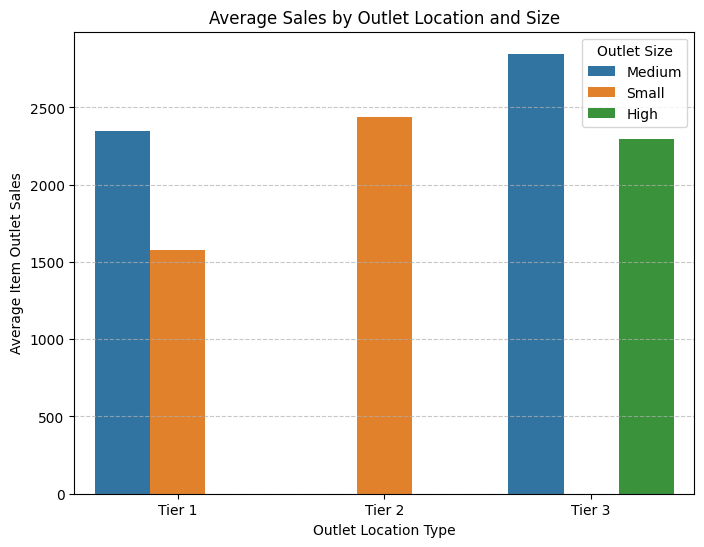

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Size', data=avg_sales_by_location_size)
plt.title('Average Sales by Outlet Location and Size')
plt.xlabel('Outlet Location Type')
plt.ylabel('Average Item Outlet Sales')
plt.xticks(rotation=0)
plt.legend(title='Outlet Size')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Cumulative Distribution of Item Outlet Sales

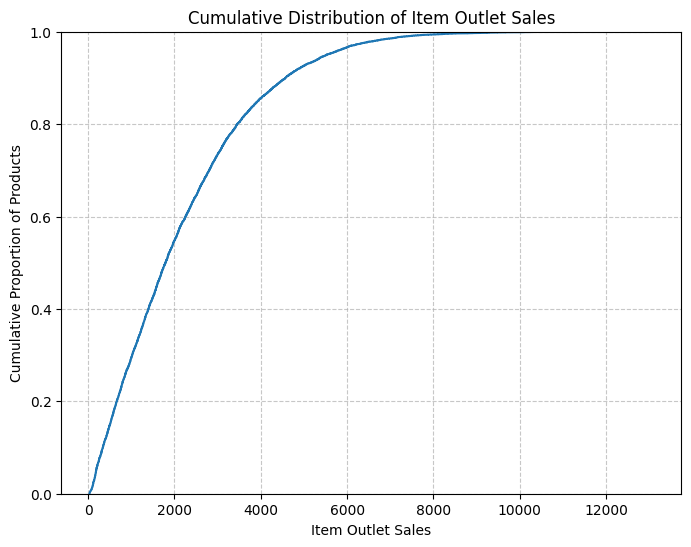

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# افترض أن لديك DataFrame باسم 'df'
# df = pd.read_csv('your_data.csv')

# Create plot
plt.figure(figsize=(8, 6))
sns.ecdfplot(x='Item_Outlet_Sales', data=df_sales)

# إضافة العنوان وتسمية المحاور
plt.title('Cumulative Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Cumulative Proportion of Products')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

In [23]:
df_sales.head()

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Id,Est_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#prepare data for modeling

## spliting data

In [24]:
#define target feature
y = df_sales['Item_Outlet_Sales']
X = df_sales.drop(columns=["Item_Outlet_Sales", "Item_Id"])

In [25]:
#split to train and test model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## making a preprocessing pipe line

#### 1. ordinal data

In [26]:
ord_cols = ["Outlet_Size"]

In [27]:
from sklearn.preprocessing import OrdinalEncoder
impute_ord=SimpleImputer(strategy='most_frequent')
ord_encoder = OrdinalEncoder(categories=[["Small", "Medium", "High"]])
## scaler
scaler = StandardScaler()
ord_pipe=make_pipeline(impute_ord,ord_encoder,scaler)
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                ('standardscaler', StandardScaler())])

#### Creating a pipline for handling categorical data



In [28]:
cat_cols=num_cols = X_train.select_dtypes("object").drop(columns=ord_cols ).columns
cat_cols


Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Id', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [29]:
df_sales= df_sales.drop(columns=['Outlet_Id','Item_Id'])

In [30]:
# Creating a pipline for handling categorical data

impute_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

cat_pipe = make_pipeline(impute_cat,encoder)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [31]:
cat_pipe.fit_transform(X_train[cat_cols])

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Id_OUT045,Outlet_Id_OUT046,Outlet_Id_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
549,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
764,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2716,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5191,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
860,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#### numeric pipeline

In [32]:
# save a list of numeric cols
num_cols=X_train.select_dtypes("number").columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Est_Year'], dtype='object')

In [33]:
num_imputer=SimpleImputer(strategy='mean')
scaler = StandardScaler()
num_pipe=make_pipeline(num_imputer,scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [34]:
from sklearn.compose import make_column_transformer

col_transformer = make_column_transformer(
    (num_pipe, num_cols),
    (cat_pipe, cat_cols),
    (ord_pipe, ord_cols)
)

col_transformer

col_transformer

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Est_Year'], dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Id', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size'])])

In [35]:
col_transformer.fit_transform(X_train) #fit column trasformer on training data

,pipeline-1__Item_Weight,pipeline-1__Item_Visibility,pipeline-1__Item_MRP,pipeline-1__Est_Year,pipeline-2__Item_Fat_Content_Low Fat,pipeline-2__Item_Fat_Content_Regular,pipeline-2__Item_Type_Baking Goods,pipeline-2__Item_Type_Breads,pipeline-2__Item_Type_Breakfast,pipeline-2__Item_Type_Canned,...,pipeline-2__Outlet_Id_OUT046,pipeline-2__Outlet_Id_OUT049,pipeline-2__Outlet_Location_Type_Tier 1,pipeline-2__Outlet_Location_Type_Tier 2,pipeline-2__Outlet_Location_Type_Tier 3,pipeline-2__Outlet_Type_Grocery Store,pipeline-2__Outlet_Type_Supermarket Type1,pipeline-2__Outlet_Type_Supermarket Type2,pipeline-2__Outlet_Type_Supermarket Type3,pipeline-3__Outlet_Size
549,-0.801383,-0.600703,0.470709,0.136169,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.284198
7757,1.210152,-0.362159,0.457877,0.493521,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.284198
764,1.115491,0.194933,-0.482625,-0.102066,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.383325
6867,-1.079448,-0.704944,-1.603553,0.493521,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.284198
2716,-0.008602,1.383177,0.218375,-0.102066,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.383325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.826231,4.282848,-0.043511,0.017052,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.284198
5191,0.642189,1.001006,-1.059078,1.089109,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.284198
5390,1.115491,-0.916931,1.526207,0.493521,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.284198
860,1.766282,-0.228187,-0.383072,1.089109,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.284198


In [36]:
X_train_processed=col_transformer.transform(X_train) #trasnform column transformer on training data
X_train_processed

,pipeline-1__Item_Weight,pipeline-1__Item_Visibility,pipeline-1__Item_MRP,pipeline-1__Est_Year,pipeline-2__Item_Fat_Content_Low Fat,pipeline-2__Item_Fat_Content_Regular,pipeline-2__Item_Type_Baking Goods,pipeline-2__Item_Type_Breads,pipeline-2__Item_Type_Breakfast,pipeline-2__Item_Type_Canned,...,pipeline-2__Outlet_Id_OUT046,pipeline-2__Outlet_Id_OUT049,pipeline-2__Outlet_Location_Type_Tier 1,pipeline-2__Outlet_Location_Type_Tier 2,pipeline-2__Outlet_Location_Type_Tier 3,pipeline-2__Outlet_Type_Grocery Store,pipeline-2__Outlet_Type_Supermarket Type1,pipeline-2__Outlet_Type_Supermarket Type2,pipeline-2__Outlet_Type_Supermarket Type3,pipeline-3__Outlet_Size
549,-0.801383,-0.600703,0.470709,0.136169,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.284198
7757,1.210152,-0.362159,0.457877,0.493521,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.284198
764,1.115491,0.194933,-0.482625,-0.102066,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.383325
6867,-1.079448,-0.704944,-1.603553,0.493521,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.284198
2716,-0.008602,1.383177,0.218375,-0.102066,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.383325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.826231,4.282848,-0.043511,0.017052,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.284198
5191,0.642189,1.001006,-1.059078,1.089109,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.284198
5390,1.115491,-0.916931,1.526207,0.493521,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.284198
860,1.766282,-0.228187,-0.383072,1.089109,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.284198


In [43]:

#Transform the training and test data and save them as new variables
X_test_processed=col_transformer.transform(X_test)#trasnform column transformer on testing data
X_test_processed

,pipeline-1__Item_Weight,pipeline-1__Item_Visibility,pipeline-1__Item_MRP,pipeline-1__Est_Year,pipeline-2__Item_Fat_Content_Low Fat,pipeline-2__Item_Fat_Content_Regular,pipeline-2__Item_Type_Baking Goods,pipeline-2__Item_Type_Breads,pipeline-2__Item_Type_Breakfast,pipeline-2__Item_Type_Canned,...,pipeline-2__Outlet_Id_OUT046,pipeline-2__Outlet_Id_OUT049,pipeline-2__Outlet_Location_Type_Tier 1,pipeline-2__Outlet_Location_Type_Tier 2,pipeline-2__Outlet_Location_Type_Tier 3,pipeline-2__Outlet_Type_Grocery Store,pipeline-2__Outlet_Type_Supermarket Type1,pipeline-2__Outlet_Type_Supermarket Type2,pipeline-2__Outlet_Type_Supermarket Type3,pipeline-3__Outlet_Size
7503,3.345425e-01,-0.773887,-0.998908,-1.293240,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.951721
2957,-1.172925e+00,0.097978,-1.586048,-0.102066,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.383325
7031,3.818727e-01,-0.481942,-1.596652,0.136169,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.284198
1084,4.203769e-16,-0.414780,0.508453,-1.531475,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.284198
856,-6.369105e-01,-1.043092,0.889079,0.731756,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.383325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7205,-2.570854e-01,0.535890,-0.235593,-0.102066,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.383325
3257,-1.388278e+00,-1.285303,0.100223,1.327344,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.284198
6346,3.818727e-01,-0.483857,-1.596652,-1.293240,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.951721
6318,-7.303877e-01,1.460103,-1.461459,1.327344,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.284198


In [38]:
df_sales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Est_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
#Build a linear regression model.
lin_reg=LinearRegression()
lin_reg.fit(X_train_processed,y_train)

LinearRegression()

In [42]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [47]:
evaluate_regression(lin_reg, X_train_processed, y_train, X_test_processed, y_test, verbose = True, output_frame = True)


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.221
- MSE = 1,303,094.392
- RMSE = 1,141.532
- R^2 = 0.559

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 792.025
- MSE = 1,143,541.300
- RMSE = 1,069.365
- R^2 = 0.579


,MAE,MSE,RMSE,R^2
Training Data,847.221,1303094.392,1141.532,0.559
Test Data,792.025,1143541.300,1069.365,0.579


the model evaluation show a bad result as the model interpret only 55% of the results, we may use Grid search